### <center>PANCA ARDHIO SAPUTRA</center>
#### <center>NIM F1D22320020</center>

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

NumPy digunakan untuk komputasi numerik, seperti operasi array dan matriks. Matplotlib digunakan untuk membuat visualisasi data, seperti grafik dan plot. Sedangkan OpenCV digunakan untuk pengolahan gambar dan komputer visi, termasuk operasi seperti membaca, menulis, dan memanipulasi gambar. Kode ini digunakan untuk memanipulasi dan memvisualisasikan gambar, dengan menggunakan NumPy untuk manipulasi matriks gambar, Matplotlib untuk menampilkan gambar, dan OpenCV untuk operasi pengolahan gambar.

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


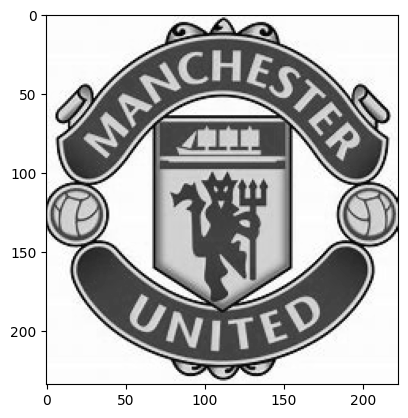

In [48]:
# file path
img1 = cv2.imread(r'C:/Users/panca/OneDrive/Documents/praktikum_pcd/modul4/manchester_united.jpeg')

# ubah ke greyscale
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")

# menunjukan gambar greyscale
print(img)

Kode di atas ini digunakan untuk membaca sebuah gambar dari lokasi file dan menyimpannya dalam variabel img1. Selanjutnya, gambar tersebut diubah menjadi citra keabuan menggunakan fungsi cv2.cvtColor() dari OpenCV, dengan mengonversi dari format warna BGR (Blue-Green-Red) menjadi grayscale.

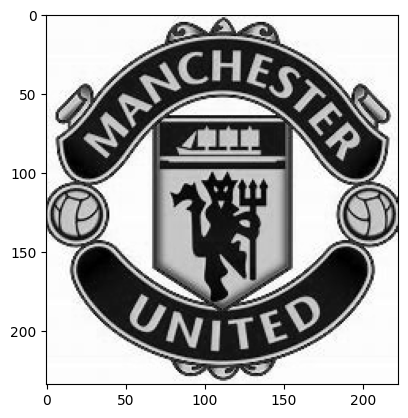

In [49]:
# meningkatkan kontras
alpha = 1.0

# mengatur kecerahan (negatif untuk result lebih gelap)
beta = -50

citra = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.imshow(citra, cmap="gray") 

In [50]:
def konvolusi(img, kernel):
    img_height, img_width = img.shape
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)

    # proses konvolusi
    for y in range(img_height):
        for x in range(img_width):
            value = 0
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    # mencari nilai piksel gambar dan nilai kernel yang sesuai
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        value += img[img_y, img_x] * kernel[ky, kx]
            output[y, x] = np.clip(value, 0, 255) 
    
    return output

Fungsi konvolusi digunakan untuk menerapkan operasi konvolusi pada gambar grayscale yang diberikan menggunakan kernel yang ditentukan. Hasil konvolusi kemudian disimpan dalam matriks output setelah diklipping ke rentang 0-255. Fungsi ini mengembalikan gambar hasil konvolusi.

In [51]:
def meanKernel(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    return konvolusi(img, kernel)

Fungsi meanKernel digunakan untuk menerapkan filter rata-rata pada gambar yang diberikan (img) dengan menggunakan kernel berukuran kernel_size x kernel_size. Kernel tersebut dibuat dengan menginisialisasi matriks kernel dengan nilai 1, kemudian divalikan dengan ukuran kernel untuk mendapatkan nilai rata-rata. Selanjutnya, fungsi konvolusi dipanggil dengan gambar dan kernel yang telah dibuat untuk menerapkan operasi konvolusi. Hasilnya adalah gambar yang telah difilter dengan filter rata-rata.

In [52]:
def medianKernel(img, kernel_size):
    img_height, img_width = img.shape
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)
    
    for y in range(img_height):
        for x in range(img_width):
            neighborhood = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        neighborhood.append(img[img_y, img_x])
            
            
            output[y, x] = np.median(neighborhood)
    
    return output

Fungsi medianKernel digunakan untuk menerapkan filter median pada gambar yang diberikan (img) dengan menggunakan kernel berukuran kernel_size x kernel_size. Kernel tersebut berfungsi untuk mengambil piksel dalam lingkungan tertentu di sekitar setiap piksel dalam gambar. Setiap piksel diubah menjadi nilai median dari nilai piksel di sekitarnya. Hasilnya adalah gambar yang telah difilter dengan filter median.

In [53]:
def modeKernel(img, kernel_size):
    img_height, img_width = img.shape
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)
    
    for y in range(img_height):
        for x in range(img_width):
            neighborhood = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        neighborhood.append(img[img_y, img_x])
            
            output[y, x] = np.bincount(neighborhood).argmax()
    
    return output

Fungsi modeKernel digunakan untuk menerapkan filter modus pada gambar yang diberikan (img) dengan menggunakan kernel berukuran kernel_size x kernel_size. Kernel tersebut berfungsi untuk mengambil piksel dalam lingkungan tertentu di sekitar setiap piksel dalam gambar. Setiap piksel diubah menjadi nilai modus dari nilai piksel di sekitarnya. Hasilnya adalah gambar yang telah difilter dengan filter modus.

In [54]:
# Kernel untuk Smoothing (Mean Filter)
customKernel_smooth = np.array([[1/10, 1/10, 1/10],
                                 [1/10, 1/5, 1/10],
                                 [1/10, 1/10, 1/10]])

# Kernel untuk Sharpening
customKernel_sharpen = np.array([[1/9, 1/9, 1/9],
                                   [1/9, 8/9, 1/9],
                                   [1/9, 1/9, 1/9]])

customKernel_smooth adalah kernel yang digunakan untuk proses penyaringan rata-rata (mean filter atau smoothing). Kernel ini dirancang untuk mengurangi noise dan menghasilkan gambar yang lebih halus dengan memberikan bobot yang sama pada semua piksel di sekitar piksel yang sedang diproses. customKernel_sharpen adalah kernel yang digunakan untuk proses penguatan (sharpening). Kernel ini bertujuan untuk meningkatkan detail dan kejelasan gambar dengan memberikan bobot yang lebih besar pada piksel di tengah dan bobot yang lebih kecil pada piksel di sekitarnya.

In [55]:
def customKernel(img, kernel):
    img_height, img_width = img.shape
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)

    for y in range(img_height):
        for x in range(img_width):
            value = 0
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        value += img[img_y, img_x] * kernel[ky, kx]
            output[y, x] = np.clip(value, 0, 255)

    return output

Fungsi customKernel digunakan untuk menerapkan filter kustom pada gambar grayscale yang diberikan (img) menggunakan kernel yang ditentukan. Fungsi ini melakukan operasi konvolusi dengan mengalikan nilai piksel gambar dengan nilai kernel yang sesuai, kemudian menjumlahkan hasilnya. Hasil konvolusi kemudian disesuaikan ke dalam rentang 0-255 menggunakan fungsi np.clip(). Hasil akhir dari proses ini adalah gambar yang telah difilter sesuai dengan kernel yang diberikan.

In [56]:
# Mean filter 3x3 dan 9x9 kernel
mean_3x3 = meanKernel(citra, 3)
mean_9x9 = meanKernel(citra, 9)

# Median filter 3x3 dan 9x9 kernel
median_3x3 = medianKernel(citra, 3)
median_9x9 = medianKernel(citra, 9)

# Mode filter 3x3 dan 9x9 kernel
mode_3x3 = modeKernel(citra, 3)
mode_9x9 = modeKernel(citra, 9)

filter rata-rata diterapkan menggunakan kernel berukuran 3x3 dan 9x9, yang masing-masing disimpan dalam variabel mean_3x3 dan mean_9x9. Kemudian, filter median diterapkan menggunakan kernel berukuran 3x3 dan 9x9, yang masing-masing disimpan dalam variabel median_3x3 dan median_9x9. Terakhir, filter modus diterapkan menggunakan kernel berukuran 3x3 dan 9x9, yang masing-masing disimpan dalam variabel mode_3x3 dan mode_9x9. Setiap filter bertujuan untuk mempengaruhi citra dengan cara yang berbeda, seperti mengurangi noise (rata-rata dan median filter) atau meningkatkan detail (mode filter).

In [57]:
# Menambahkan smoothing (Mean Filter) dengan kernel kustom
smoothed_image = customKernel(citra, customKernel_smooth)

# Menambahkan sharpening dengan kernel kustom
sharpened_image = customKernel(citra, customKernel_sharpen)

proses smoothing (mean filter) diterapkan pada citra menggunakan kernel kustom yang disimpan dalam variabel customKernel_smooth. Hasilnya disimpan dalam variabel smoothed_image. Kemudian, proses sharpening diterapkan pada citra menggunakan kernel kustom yang disimpan dalam variabel customKernel_sharpen. Hasilnya disimpan dalam variabel sharpened_image. Proses smoothing bertujuan untuk mengurangi noise dan membuat gambar lebih halus, sedangkan proses sharpening bertujuan untuk meningkatkan detail dan kejelasan gambar.

Setiap jenis filter ditampilkan dalam subplot terpisah dengan pengaturan ukuran dan judul yang sesuai. Plot pertama dan kedua menampilkan hasil dari filter rata-rata dengan kernel berukuran 3x3 dan 9x9. Plot ketiga menampilkan hasil dari proses sharpening, sementara plot keempat menampilkan hasil dari proses smoothing menggunakan kernel kustom. Plot kelima dan keenam menampilkan hasil dari filter modus dengan kernel berukuran 3x3 dan 9x9. Plot terakhir menampilkan hasil dari filter median dengan kernel berukuran 3x3 dan 9x9. Setiap subplot ditampilkan dalam skema warna grayscale dan sumbu x dan y dinonaktifkan untuk fokus pada hasil visual dari masing-masing filter.

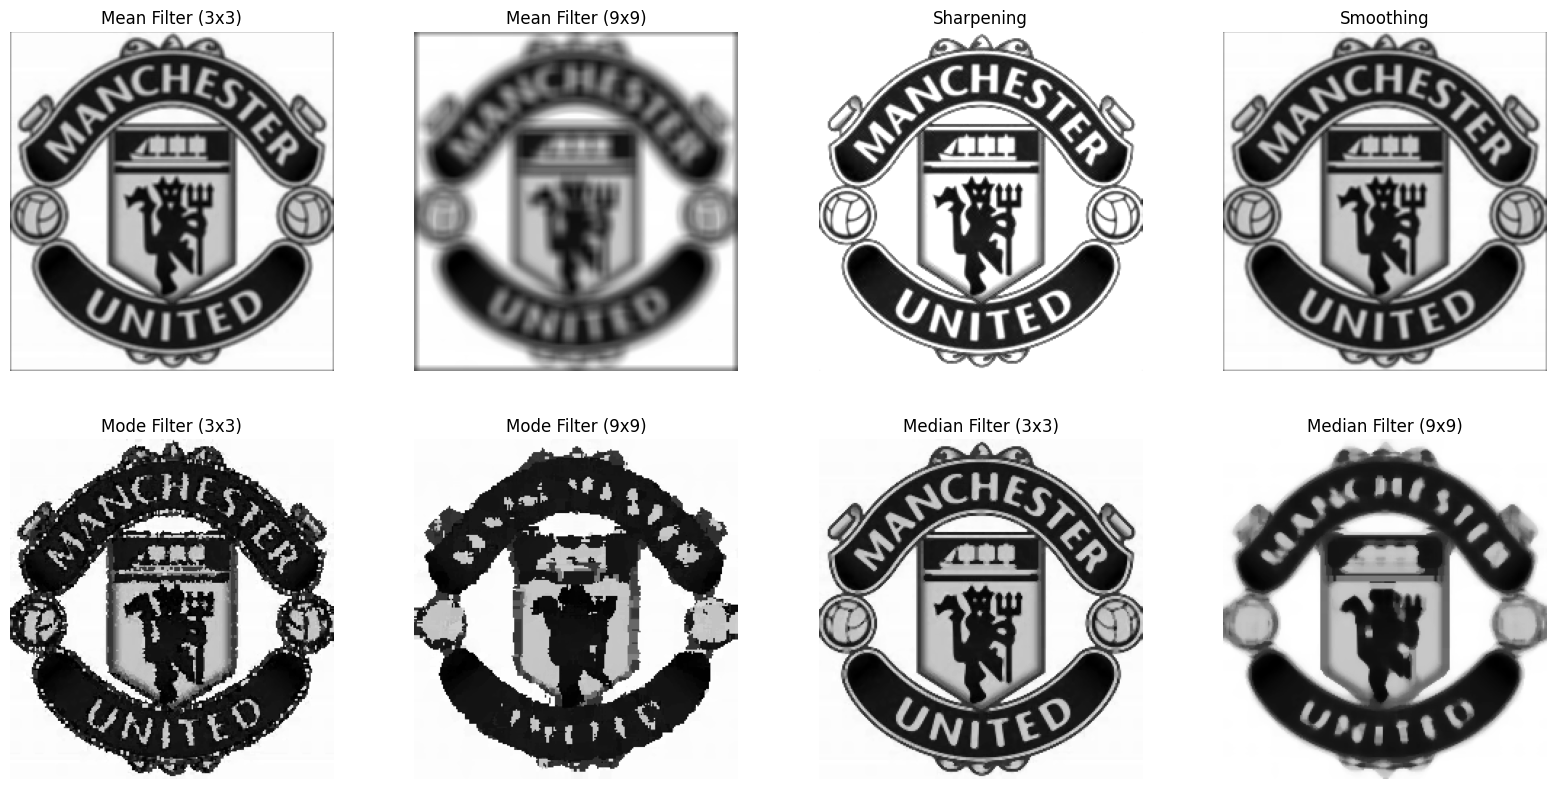

In [58]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 4, 1)
plt.imshow(mean_3x3, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 2)
plt.imshow(mean_9x9, cmap="gray")
plt.title("Mean Filter (9x9)")
plt.axis("off")

plt.subplot(3, 4, 3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpening")
plt.axis("off")

plt.subplot(3, 4, 4)
plt.imshow(smoothed_image, cmap="gray")
plt.title("Smoothing")
plt.axis("off")

plt.subplot(3, 4, 5)
plt.imshow(mode_3x3, cmap="gray")
plt.title("Mode Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 6)
plt.imshow(mode_9x9, cmap="gray")
plt.title("Mode Filter (9x9)")
plt.axis("off")

plt.subplot(3, 4, 7)
plt.imshow(median_3x3, cmap="gray")
plt.title("Median Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 8)
plt.imshow(median_9x9, cmap="gray")
plt.title("Median Filter (9x9)")
plt.axis("off")

plt.show()

In [59]:
sobelx=np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]
               ])

sobely=np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]
                ])

In [60]:
def metodeSobel(matriks, kernel):
    arr_tam = np.zeros(matriks.shape)
    for i in range(1, matriks.shape[0]-1):
        for j in range(1, matriks.shape[1]-1):  
            x_kernel = 0
            for k in range(i-1, i+2):
                y_kernel = 0
                for l in range(j-1, j+2):
                    arr_tam[i][j] += matriks[k][l] * kernel[x_kernel][y_kernel]
                    y_kernel+=1
                x_kernel+=1
    return arr_tam

def final (y, x):
    hasil = abs(y) + abs(x)
    return hasil

In [61]:
# filter mean 3x3
mean3x3_sobelx = metodeSobel(mean_3x3, sobelx)
mean3x3_sobely = metodeSobel(mean_3x3, sobely)
sobel_mean_3x3 = final(mean3x3_sobelx, mean3x3_sobely)

# filter mean 9x9
mean9x9_sobelx = metodeSobel(mean_9x9, sobelx)
mean9x9_sobely = metodeSobel(mean_9x9, sobely)
sobel_mean_9x9 = final(mean9x9_sobelx, mean9x9_sobely)

# sharpening
sharpened_sobelx = metodeSobel(sharpened_image, sobelx)
sharpened_sobely = metodeSobel(sharpened_image, sobely)
sobelSharpen = final(sharpened_sobelx, sharpened_sobely)

# smoothing
smoothed_sobelx = metodeSobel(smoothed_image, sobelx)
smoothed_sobely = metodeSobel(smoothed_image, sobely)
sobelSmooth = final(smoothed_sobelx, smoothed_sobely)

# modus 3x3
mode3x3_sobelx = metodeSobel(mode_3x3, sobelx)
mode3x3_sobely = metodeSobel(mode_3x3, sobely)
sobelMode_3x3 = final(mode3x3_sobelx, mode3x3_sobely)

# modus 9x9
mode9x9_sobelx = metodeSobel(mode_9x9, sobelx)
mode9x9_sobely = metodeSobel(mode_9x9, sobely)
sobelMode_9x9 = final(mode9x9_sobelx, mode9x9_sobely)

# median 3x3
median3x3_sobelx = metodeSobel(median_3x3, sobelx)
median3x3_sobely = metodeSobel(median_3x3, sobely)
sobelMedian_3x3 = final(median3x3_sobelx, median3x3_sobely)

# median 9x9
median9x9_sobelx = metodeSobel(median_9x9, sobelx)
median9x9_sobely = metodeSobel(median_9x9, sobely)
sobelMedian_9x9 = final(median9x9_sobelx, median9x9_sobely) 

metode Sobel diterapkan pada filter mean dengan kernel 3x3 dan 9x9, serta pada hasil dari proses sharpening dan smoothing. Kemudian, metode Sobel juga diterapkan pada filter modus dengan kernel 3x3 dan 9x9, serta pada hasil dari filter median dengan kernel 3x3 dan 9x9. Metode Sobel digunakan untuk mengekstraksi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal dari setiap jenis filter yang diterapkan sebelumnya, dengan menghitung gradien intensitas dari turunan parsial dalam kedua arah menggunakan kernel Sobel. Hasil akhir dari proses ini adalah matriks yang menunjukkan kekuatan gradien intensitas di setiap titik piksel dalam gambar.

Kode tersebut menggunakan Matplotlib untuk menampilkan visualisasi dari hasil deteksi tepi menggunakan metode Sobel pada berbagai jenis filter yang telah diterapkan pada gambar. Setiap jenis filter ditampilkan dalam subplot terpisah dengan pengaturan ukuran dan judul yang sesuai. Plot pertama dan kedua menampilkan hasil deteksi tepi menggunakan metode Sobel pada filter mean dengan kernel 3x3 dan 9x9. Plot ketiga menampilkan hasil deteksi tepi pada proses sharpening, sementara plot keempat menampilkan hasil deteksi tepi pada proses smoothing. Plot kelima dan keenam menampilkan hasil deteksi tepi pada filter modus dengan kernel 3x3 dan 9x9. Plot terakhir menampilkan hasil deteksi tepi pada filter median dengan kernel 3x3 dan 9x9. Setiap subplot ditampilkan dalam skema warna grayscale dan sumbu x dan y dinonaktifkan untuk fokus pada hasil visual dari masing-masing deteksi tepi.

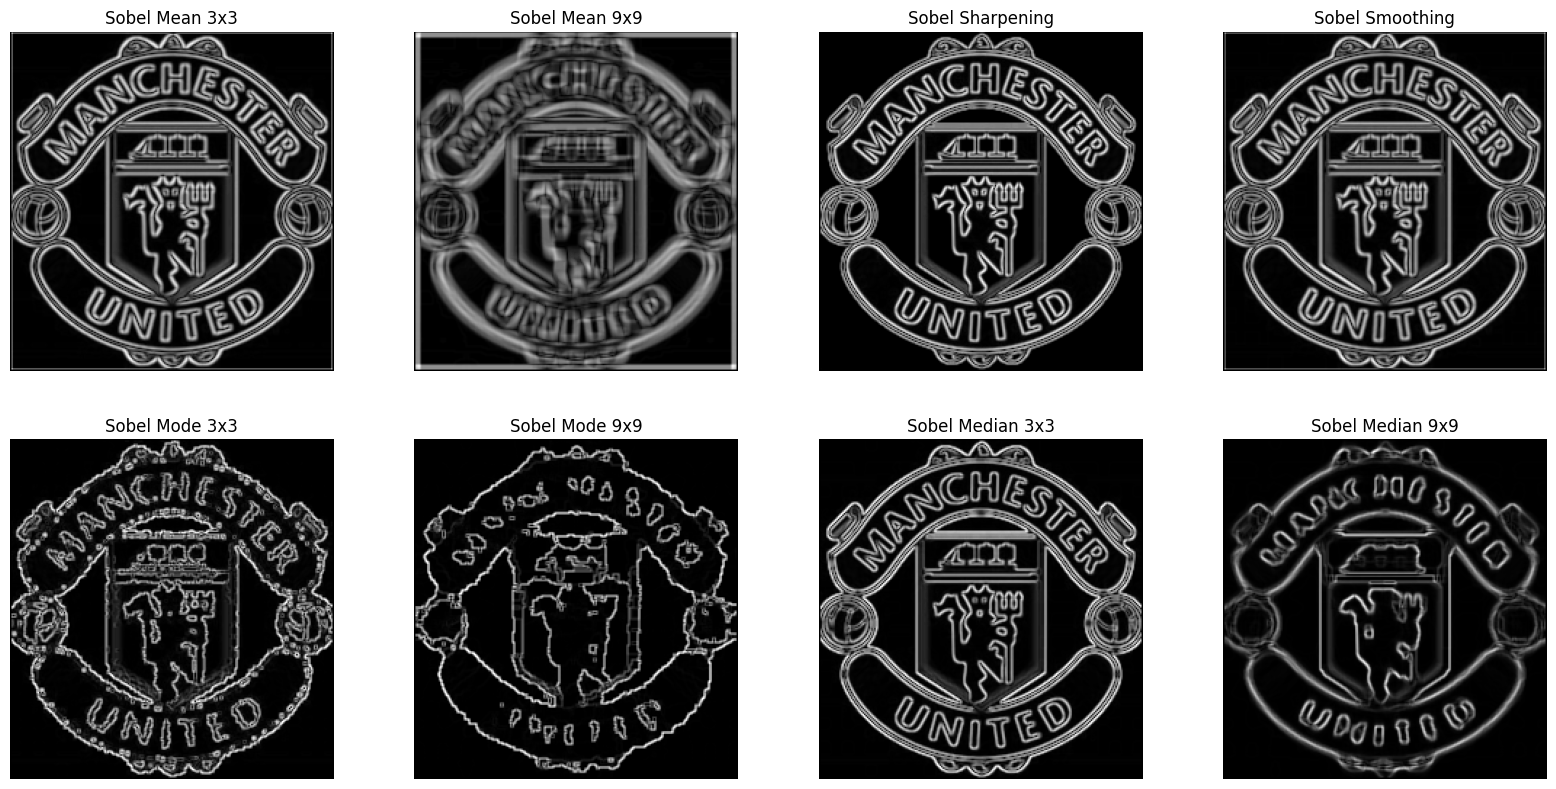

In [62]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 4, 1)
plt.imshow(sobel_mean_3x3, cmap="gray")
plt.title("Sobel Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(sobel_mean_9x9, cmap="gray")
plt.title("Sobel Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(sobelSharpen, cmap="gray")
plt.title("Sobel Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(sobelSmooth, cmap="gray")
plt.title("Sobel Smoothing")   
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(sobelMode_3x3, cmap="gray")
plt.title("Sobel Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(sobelMode_9x9, cmap="gray")
plt.title("Sobel Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(sobelMedian_3x3, cmap="gray")
plt.title("Sobel Median 3x3")
plt.axis("off")
plt.subplot(3, 4, 8)
plt.imshow(sobelMedian_9x9, cmap="gray")
plt.title("Sobel Median 9x9")
plt.axis("off")

plt.show()

In [63]:
px = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]
               ])

py = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]
                ])

Variabel px dan py mendefinisikan kernel yang digunakan untuk mendeteksi tepi menggunakan metode Prewitt. Kernel px adalah kernel Prewitt untuk mendeteksi tepi secara horizontal, yang digunakan untuk menangkap perubahan intensitas piksel dari kiri ke kanan. Sedangkan kernel py adalah kernel Prewitt untuk mendeteksi tepi secara vertikal, yang digunakan untuk menangkap perubahan intensitas piksel dari atas ke bawah.

In [64]:
def prewitt(matriks, kernel):
    arr_tam = np.zeros(matriks.shape)
    for i in range(1, matriks.shape[0]-1):
        for j in range(1, matriks.shape[1]-1):  
            x_kernel = 0
            for k in range(i-1, i+2):
                y_kernel = 0
                for l in range(j-1, j+2):
                    arr_tam[i][j] += matriks[k][l] * kernel[x_kernel][y_kernel]
                    y_kernel+=1
                x_kernel+=1
    return arr_tam

Fungsi prewitt digunakan untuk menerapkan metode Prewitt dalam deteksi tepi pada matriks gambar yang diberikan (matriks) menggunakan kernel Prewitt yang ditentukan. Fungsi ini melakukan operasi konvolusi antara matriks gambar dan kernel Prewitt secara manual, dengan mengalikan nilai piksel dengan nilai kernel yang sesuai dan menjumlahkannya untuk setiap titik piksel dalam gambar. Hasilnya adalah matriks yang berisi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal pada gambar.

In [65]:
# filter mean 3x3
mean3x3_prewittx = prewitt(mean_3x3, px)
mean3x3_prewitty = prewitt(mean_3x3, py)
prewittmean_3x3 = final(mean3x3_prewittx, mean3x3_prewitty)

# filter mean 9x9
mean9x9_prewittx = prewitt(mean_9x9, px)
mean9x9_prewitty = prewitt(mean_9x9, py)
prewittmean_9x9 = final(mean9x9_prewittx, mean9x9_prewitty)

# sharpening
sharpened_prewittx = prewitt(sharpened_image, px)
sharpened_prewitty = prewitt(sharpened_image, py)
prewittsharpen = final(sharpened_prewittx, sharpened_prewitty)

# smoothing
smoothed_prewittx = prewitt(smoothed_image, px)
smoothed_prewitty = prewitt(smoothed_image, py)
prewittsmooth = final(smoothed_prewittx, smoothed_prewitty)

# modus 3x3
mode3x3_prewittx = prewitt(mode_3x3, px)
mode3x3_prewitty = prewitt(mode_3x3, py)
prewittmode_3x3 = final(mode3x3_prewittx, mode3x3_prewitty)

# modus 9x9
mode9x9_prewittx = prewitt(mode_9x9, px)
mode9x9_prewitty = prewitt(mode_9x9, py)
prewittmode_9x9 = final(mode9x9_prewittx, mode9x9_prewitty)

# median 3x3
median3x3_prewittx = prewitt(median_3x3, px)
median3x3_prewitty = prewitt(median_3x3, py)
prewittmedian_3x3 = final(median3x3_prewittx, median3x3_prewitty)

# median 9x9
median9x9_prewittx = prewitt(median_9x9, px)
median9x9_prewitty = prewitt(median_9x9, py)
prewittmedian_9x9 = final(median9x9_prewittx, median9x9_prewitty)

metode Prewitt diterapkan pada filter mean dengan kernel 3x3 dan 9x9, serta pada hasil dari proses sharpening dan smoothing. Kemudian, metode Prewitt juga diterapkan pada filter modus dengan kernel 3x3 dan 9x9, serta pada hasil dari filter median dengan kernel 3x3 dan 9x9. Metode Prewitt digunakan untuk mengekstraksi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal dari setiap jenis filter yang diterapkan sebelumnya, dengan menghitung gradien intensitas dari turunan parsial dalam kedua arah menggunakan kernel Prewitt. Hasil akhir dari proses ini adalah matriks yang menunjukkan kekuatan gradien intensitas di setiap titik piksel dalam gambar.

Kode tersebut menggunakan Matplotlib untuk menampilkan visualisasi dari hasil deteksi tepi menggunakan metode Prewitt pada berbagai jenis filter yang telah diterapkan pada gambar. Setiap jenis filter ditampilkan dalam subplot terpisah dengan pengaturan ukuran dan judul yang sesuai. Plot pertama dan kedua menampilkan hasil deteksi tepi menggunakan metode Prewitt pada filter mean dengan kernel 3x3 dan 9x9. Plot ketiga menampilkan hasil deteksi tepi pada proses sharpening, sementara plot keempat menampilkan hasil deteksi tepi pada proses smoothing. Plot kelima dan keenam menampilkan hasil deteksi tepi pada filter modus dengan kernel 3x3 dan 9x9. Plot terakhir menampilkan hasil deteksi tepi pada filter median dengan kernel 3x3 dan 9x9. Setiap subplot ditampilkan dalam skema warna grayscale dan sumbu x dan y dinonaktifkan untuk fokus pada hasil visual dari masing-masing deteksi tepi.

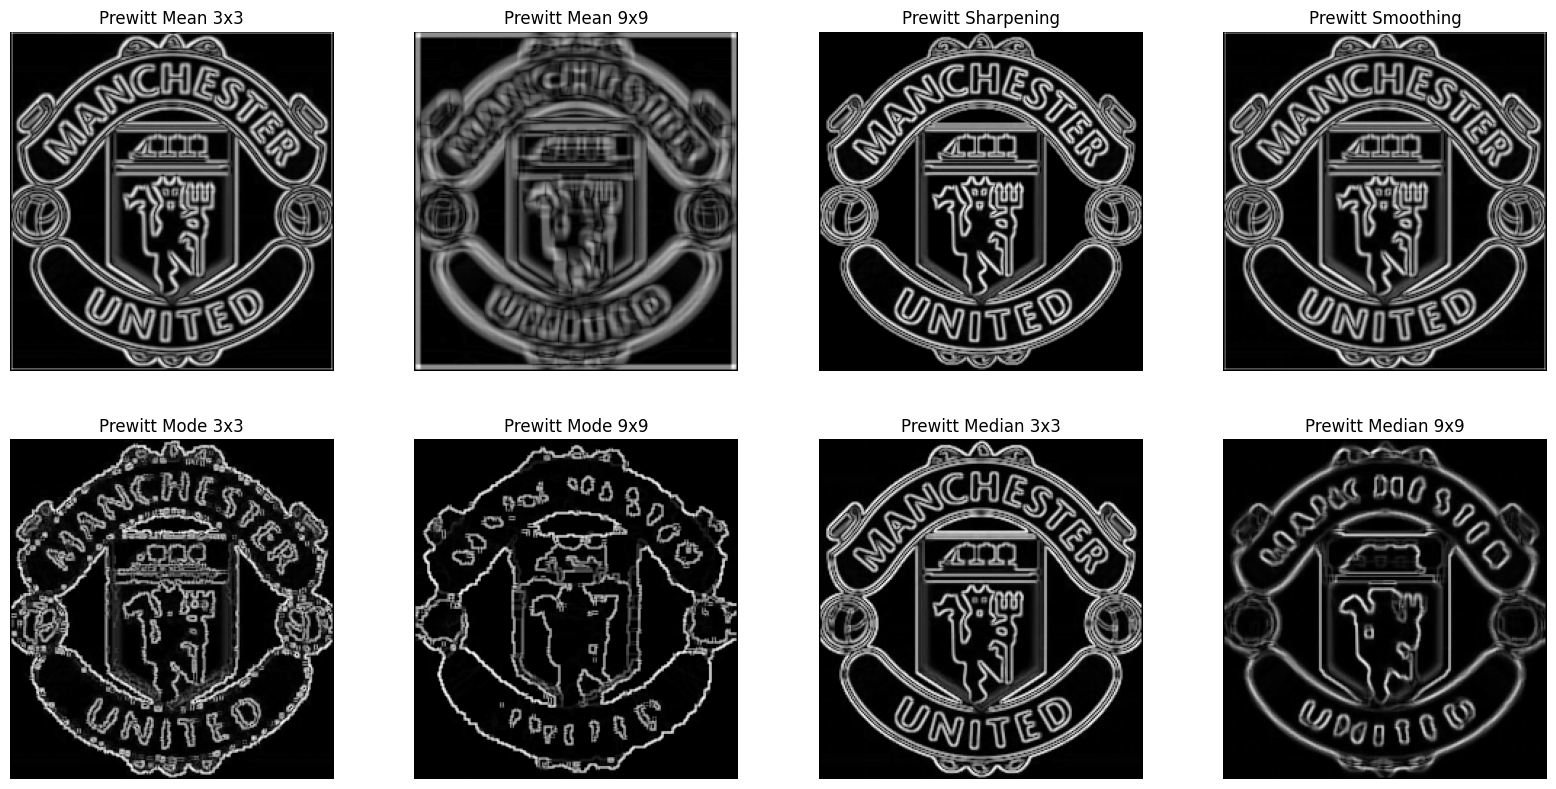

In [66]:
plt.figure(figsize=(20, 15))    

plt.subplot(3, 4, 1)
plt.imshow(prewittmean_3x3, cmap="gray")
plt.title("Prewitt Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(prewittmean_9x9, cmap="gray")
plt.title("Prewitt Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(prewittsharpen, cmap="gray")
plt.title("Prewitt Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(prewittsmooth, cmap="gray")
plt.title("Prewitt Smoothing")
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(prewittmode_3x3, cmap="gray")
plt.title("Prewitt Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(prewittmode_9x9, cmap="gray")
plt.title("Prewitt Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(prewittmedian_3x3, cmap="gray")
plt.title("Prewitt Median 3x3")
plt.axis("off")
plt.subplot(3, 4, 8)
plt.imshow(prewittmedian_9x9, cmap="gray")
plt.title("Prewitt Median 9x9")

plt.axis("off")

plt.show()

In [67]:
rx = np.array ([[1,0], [0,-1]])
ry = np.array ([[0,1], [-1,0]])

Fungsi konvRoberts digunakan untuk menerapkan operasi konvolusi dengan kernel Roberts pada matriks gambar yang diberikan (c). Fungsi ini melakukan konvolusi secara manual antara matriks gambar dan kernel Roberts, dengan mengalikan nilai piksel dengan nilai kernel yang sesuai dan menjumlahkannya untuk setiap titik piksel dalam gambar. Hasilnya adalah matriks yang berisi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal pada gambar.

In [68]:
def konvRoberts (c, k):
    baris, kolom = c.shape
    hasil = np.zeros (c.shape)
    for i in range(baris-1):
        for j in range(kolom-1):
            hasil[i,j]=c[i,j]*k[0,0]+c[i,j+1]*k[0,1]+c[i+1,j]*k[1,0]+c[i+1,j+1]*k[1,1]
    return hasil

Fungsi konvRoberts digunakan untuk menerapkan operasi konvolusi dengan kernel Roberts pada matriks gambar yang diberikan (c). Fungsi ini melakukan konvolusi secara manual antara matriks gambar dan kernel Roberts, dengan mengalikan nilai piksel dengan nilai kernel yang sesuai dan menjumlahkannya untuk setiap titik piksel dalam gambar. Hasilnya adalah matriks yang berisi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal pada gambar.

In [69]:
def finalRoberts (sumbu_x, sumbu_y):
    hasil = np.sqrt (pow(sumbu_x,2)+pow(sumbu_y,2))
    return hasil

Fungsi finalRoberts digunakan untuk menghitung magnitude atau kekuatan gradien intensitas dari hasil deteksi tepi menggunakan metode Roberts pada sumbu-x dan sumbu-y. Fungsi ini mengambil matriks gradien intensitas dari kedua sumbu sebagai input, dan menghitung magnitude gradien intensitas di setiap titik piksel dalam gambar dengan menggunakan rumus Euclidean distance atau akar kuadrat dari penjumlahan kuadrat gradien intensitas pada kedua sumbu. Hasilnya adalah matriks yang menunjukkan kekuatan gradien intensitas di setiap titik piksel dalam gambar.

In [70]:
# mean 3x3
mean3x3_robertsx = konvRoberts(mean_3x3, rx)
mean3x3_robertsy = konvRoberts(mean_3x3, ry)
robertsmean_3x3 = finalRoberts(mean3x3_robertsx, mean3x3_robertsy)

# mean 9x9
mean9x9_robertsx = konvRoberts(mean_9x9, rx)
mean9x9_robertsy = konvRoberts(mean_9x9, ry)
robertsmean_9x9 = finalRoberts(mean9x9_robertsx, mean9x9_robertsy)

# sharpening
sharpened_robertsx = konvRoberts(sharpened_image, rx)
sharpened_robertsy = konvRoberts(sharpened_image, ry)
robertssharpen = finalRoberts(sharpened_robertsx, sharpened_robertsy)

# smoothing
smoothed_robertsx = konvRoberts(smoothed_image, rx)
smoothed_robertsy = konvRoberts(smoothed_image, ry)
robertssmooth = finalRoberts(smoothed_robertsx, smoothed_robertsy)

# modus 3x3
mode3x3_robertsx = konvRoberts(mode_3x3, rx)
mode3x3_robertsy = konvRoberts(mode_3x3, ry)
robertsmodus_3x3 = finalRoberts(mode3x3_robertsx, mode3x3_robertsy)

# modus 9x9
mode9x9_robertsx = konvRoberts(mode_9x9, rx)
mode9x9_robertsy = konvRoberts(mode_9x9, ry)
robertsmodus_9x9 = finalRoberts(mode9x9_robertsx, mode9x9_robertsy)

# median 3x3
median3x3_robertsx = konvRoberts(median_3x3, rx)
median3x3_robertsy = konvRoberts(median_3x3, ry)
robertsmedian_3x3 = finalRoberts(median3x3_robertsx, median3x3_robertsy)

# median 9x9
median9x9_robertsx = konvRoberts(median_9x9, rx)
median9x9_robertsy = konvRoberts(median_9x9, ry)
robertsmedian_9x9 = finalRoberts(median9x9_robertsx, median9x9_robertsy)

Kode tersebut menerapkan metode Roberts untuk deteksi tepi pada berbagai jenis filter yang telah diterapkan sebelumnya pada gambar. Pertama, metode Roberts diterapkan pada filter mean dengan kernel 3x3 dan 9x9, serta pada hasil dari proses sharpening dan smoothing. Kemudian, metode Roberts juga diterapkan pada filter modus dengan kernel 3x3 dan 9x9, serta pada hasil dari filter median dengan kernel 3x3 dan 9x9. Metode Roberts digunakan untuk mengekstraksi informasi tentang gradien intensitas dalam kedua arah horizontal dan vertikal dari setiap jenis filter yang diterapkan sebelumnya, dengan menghitung gradien intensitas menggunakan kernel Roberts. Hasil akhir dari proses ini adalah matriks yang menunjukkan kekuatan gradien intensitas di setiap titik piksel dalam gambar.

Setiap jenis filter ditampilkan dalam subplot terpisah dengan pengaturan ukuran dan judul yang sesuai. Plot pertama dan kedua menampilkan hasil deteksi tepi menggunakan metode Roberts pada filter mean dengan kernel 3x3 dan 9x9. Plot ketiga menampilkan hasil deteksi tepi pada proses sharpening, sementara plot keempat menampilkan hasil deteksi tepi pada proses smoothing. Plot kelima dan keenam menampilkan hasil deteksi tepi pada filter modus dengan kernel 3x3 dan 9x9. Plot terakhir menampilkan hasil deteksi tepi pada filter median dengan kernel 3x3 dan 9x9. Setiap subplot ditampilkan dalam skema warna grayscale dan sumbu x dan y dinonaktifkan untuk fokus pada hasil visual dari masing-masing deteksi tepi.

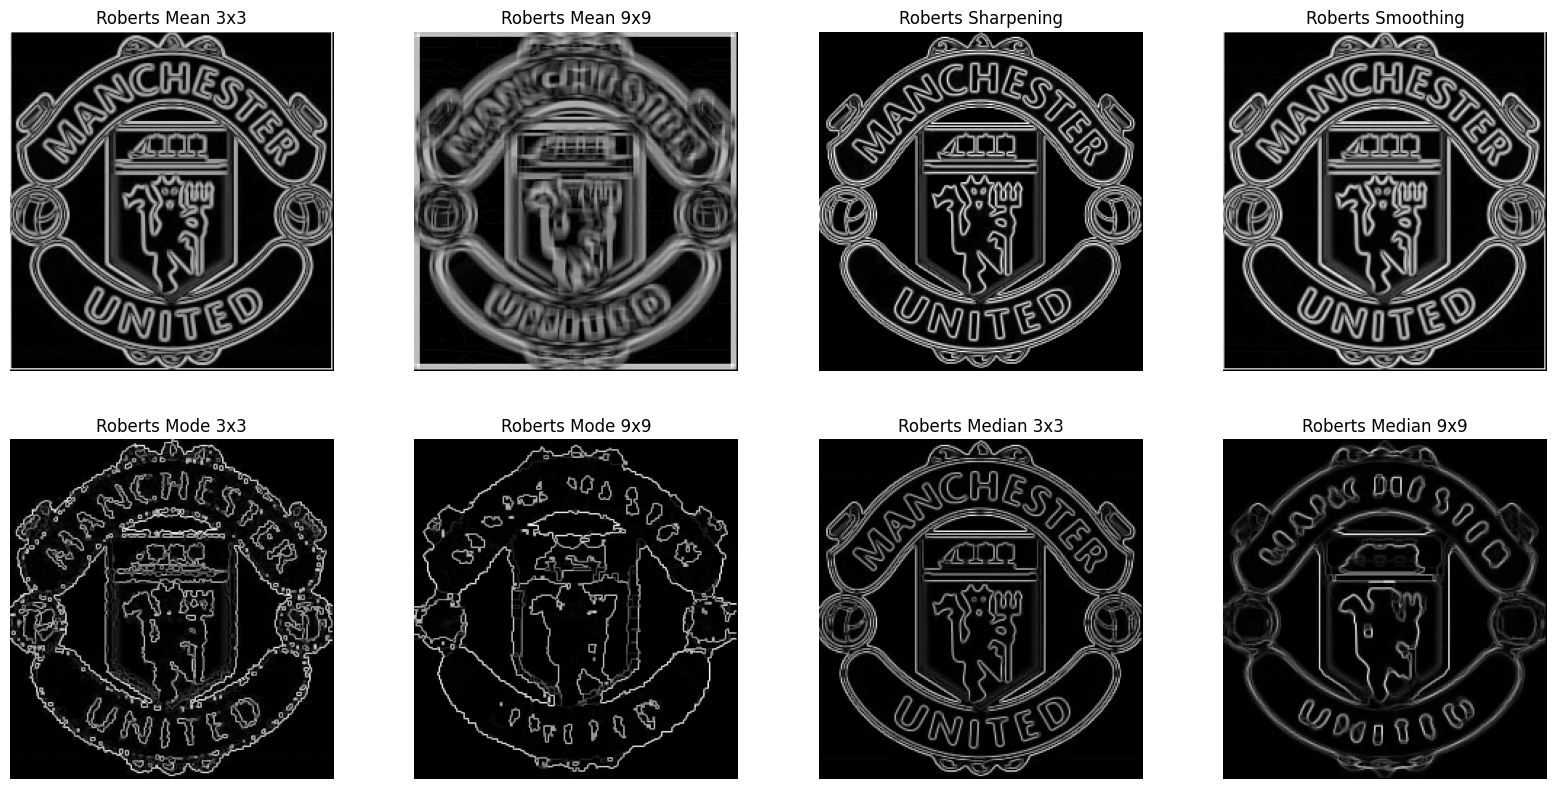

In [71]:
# Plot Hasil
plt.figure(figsize=(20, 15))    

plt.subplot(3, 4, 1)
plt.imshow(robertsmean_3x3, cmap="gray")
plt.title("Roberts Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(robertsmean_9x9, cmap="gray")
plt.title("Roberts Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(robertssharpen, cmap="gray")
plt.title("Roberts Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(robertssmooth, cmap="gray")
plt.title("Roberts Smoothing")
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(robertsmodus_3x3, cmap="gray")
plt.title("Roberts Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(robertsmodus_9x9, cmap="gray")
plt.title("Roberts Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(robertsmedian_3x3, cmap="gray")
plt.title("Roberts Median 3x3")
plt.axis("off") 
plt.subplot(3, 4, 8)
plt.imshow(robertsmedian_9x9, cmap="gray")
plt.title("Roberts Median 9x9")
plt.axis("off")

plt.show()